<a href="https://colab.research.google.com/github/husfuu/articles/blob/main/medium/EDA_COVID_19_Indonesia_Province_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on COVID-19

## Data

https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases?select=province.csv

## Library and Utilities

In [38]:
import pandas as pd
import numpy as np
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
# import chart_studio.plotly as py


# additional
colors = ['#E7FBBE', '#072227']

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Repository Projects/dsls/province_indonesia_covid19.csv', encoding="ISO-8859-1", index_col='province_id')

In [3]:
df.head()

,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
province_id,,,,,,,,,,,
1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_name        35 non-null     object
 1   island               35 non-null     object
 2   iso_code             35 non-null     object
 3   capital_city         35 non-null     object
 4   population           35 non-null     int64 
 5   population_kmsquare  35 non-null     int64 
 6   confirmed            35 non-null     int64 
 7   deceased             35 non-null     int64 
 8   released             35 non-null     int64 
 9   longitude            35 non-null     object
 10  latitude             35 non-null     object
dtypes: int64(5), object(6)
memory usage: 3.3+ KB


## Exploratory Data Analysis

## Descriptive statistics


In [5]:
df.describe()

,population,population_kmsquare,confirmed,deceased,released
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,7.200513e+06,289.057143,29.628571,2.485714,1.314286
std,1.060302e+07,424.064780,101.741045,8.846307,5.400280
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.881108e+06,41.500000,1.000000,0.000000,0.000000
50%,3.553100e+06,93.000000,4.000000,0.000000,0.000000
75%,7.064971e+06,232.000000,10.000000,1.000000,0.000000
max,4.602967e+07,1353.000000,598.000000,51.000000,31.000000


In [11]:
#@title Box Plot and Distribution of Numeric Variables
num_col = ['population', 'population_kmsquare', 'confirmed', 'deceased', 'released']

def num_plot(dataframe, colName):
  """doc
  plot numeric variable of the dataframe
  params:
    dataframe: dataframe object
    colName: string
  return plot
  """
  
  fig = make_subplots(rows=1, cols=2, subplot_titles=('Quantiles', 'Distribution'))

  fig.add_trace(go.Box(y = dataframe[colName],
                     name = str(colName),
                     showlegend = False,
                     marker_color = colors[1],
                     ),
              row=1, col=1
              )

  fig.add_trace(go.Histogram(x = dataframe[colName],
                           xbins = dict(start=0, end=dataframe[colName].max()),
                           showlegend = False,
                           name = str(colName),
                           marker = dict(color=colors[0],
                                         line=dict(color='white',
                                                   width=2))
                           ),
              row=1, col=2
              )
  fig.update_layout(title={'text': str(colName),
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                  template='ggplot2')
  iplot(fig)

numeric_col = "population" #@param {type:"string"}
num_plot(df, numeric_col)

In [6]:
df.loc[6]

province_name           DKI Jakarta
island                         Jawa
iso_code                         JK
capital_city                Jakarta
population                 10012271
population_kmsquare            1353
confirmed                       598
deceased                         51
released                         31
longitude               106.853.027
latitude                 -6.162.401
Name: 6, dtype: object

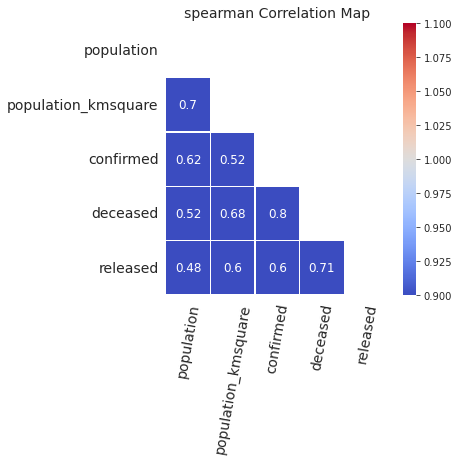

In [10]:
#@title Correlation Plot
def correlation_plot(dataframe, method_name):
  sns.set_style('white')
  matrix = np.triu(dataframe.corr(method=method_name))
  f, ax = plt.subplots(figsize = (matrix.shape[0],
                                  matrix.shape[1]))
  sns.heatmap(dataframe.corr(method=method_name),
              annot=True,
              ax=ax,
              vmin=1,
              vmax=1,
              mask=matrix,
              cmap = "coolwarm",
              linewidth = 0.4,
              linecolor = "white",
              annot_kws={"size": 12})
  plt.xticks(rotation=80, size=14)
  plt.yticks(rotation=0, size=14)
  plt.title(f'{method_name} Correlation Map', size=14)
  plt.show()

method_name = "spearman" #@param {type:"string"}
correlation_plot(df, method_name)

In [ ]:
#@title Observe each case in each Province
case_name = "confirmed" #@param {type:"string"}
def province_case_plot(dataframe, name_case):
  data = go.Bar(x=df['province_name'],
        y=df[name_case],
        marker=dict(color=colors[1],
                      line_color='white',
                      line_width=2)
        )
  layout = go.Layout(title={'text': f' The Number of {name_case} case every Provinces',
                                'x': 0.5,
                                'y': 0.9,
                                'xanchor': 'center',
                                'yanchor': 'top'},
                    xaxis = dict(title='Provinces'),
                    yaxis = dict(title=f'{name_case}')
                    )
  
  fig = go.Figure(data, layout)
  iplot(fig)


province_case_plot(df, case_name)

In [45]:
#@title Percentage of Released and Deceased on Confirmed

def percentageCase(dataframe, province_name):
  for i in range (len(df)):
      if (df.loc[i+1].province_name.replace('\xa0','') == province_name):
        index = i
  case_data = pd.DataFrame({
    'desc': ['confirmed', 'released', 'deceased'], 
    'number of people': [
                         df.loc[index].confirmed-df.loc[index].released - df.loc[index].deceased, 
                         df.loc[index].released,
                         df.loc[index].deceased
                         ]
                         })
          
  data = go.Pie(labels=[x for x in case_data['desc']],
                     values=case_data['number of people'].values
  )
  fig = go.Figure(data)
  iplot(fig)

province_name = "DKI Jakarta" #@param {type:"string"}
percentageCase(df, province_name)